In [11]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
x_train.shape

(60000, 28, 28)

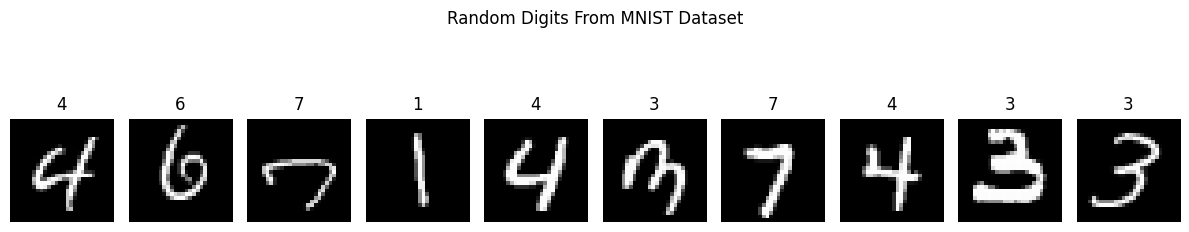

In [13]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 10
random_indices = np.random.choice(x_train.shape[0], num_images, replace=False)
plt.figure(figsize=(12, 3))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(str(y_train[idx]))
    plt.axis("off")
plt.suptitle("Random Digits From MNIST Dataset")
plt.tight_layout()
plt.show()

### Question 3
Every image has 28x28 pixels, we can see that from the shape of the downloaded datasets.
No, image pixels do not have the same importance. The pixels located at the corners have low importance since in most of the digits they have the same color. The important pixels are located in the center of the image, since their structure affects the shape of the depicted digit. 

In [14]:
# Flatten images for KNN
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Train and test KNN classifier
from sklearn.neighbors import KNeighborsClassifier

upper_limit = int(np.sqrt(x_train_flat.shape[0]))
accuracies = {}
for k in [5, 15, 51, upper_limit]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)
    accuracy = knn.score(x_test_flat, y_test)
    print(f"k={k} KNN test accuracy: {accuracy:.4f}")
    accuracies[k] = accuracy


k=5 KNN test accuracy: 0.9688
k=15 KNN test accuracy: 0.9633
k=15 KNN test accuracy: 0.9633
k=51 KNN test accuracy: 0.9533
k=51 KNN test accuracy: 0.9533
k=244 KNN test accuracy: 0.9241
k=244 KNN test accuracy: 0.9241


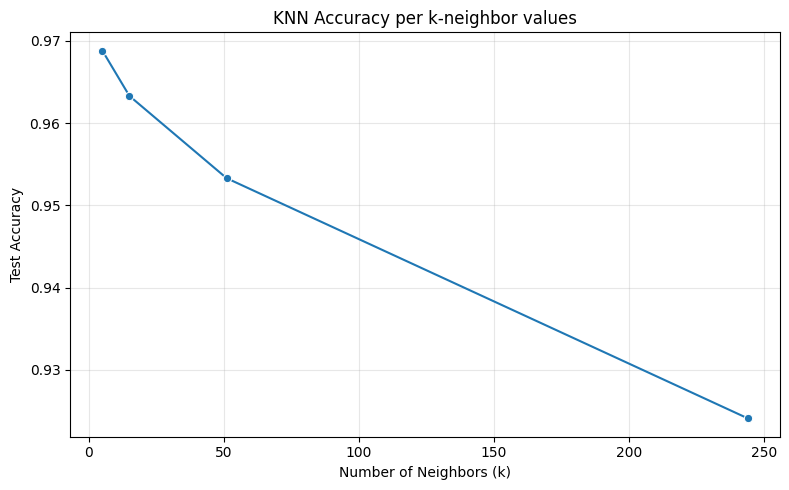

In [15]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.lineplot(x=list(accuracies.keys()), y=list(accuracies.values()), marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Accuracy")
plt.title("KNN Accuracy per k-neighbor values")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
x_train_flat_norm = x_train_flat / 255
x_test_flat_norm = x_test_flat / 255

accuracies_norm = {}
for k in [5, 15, 51, upper_limit]:
    knn_norm = KNeighborsClassifier(n_neighbors=k)
    knn_norm.fit(x_train_flat_norm, y_train)
    accuracy = knn_norm.score(x_test_flat_norm, y_test)
    print(f"k={k} KNN on normalized data test accuracy: {accuracy:.4f}")
    accuracies_norm[k] = accuracy

k=5 KNN on normalized data test accuracy: 0.9688
k=15 KNN on normalized data test accuracy: 0.9633
k=15 KNN on normalized data test accuracy: 0.9633
k=51 KNN on normalized data test accuracy: 0.9533
k=51 KNN on normalized data test accuracy: 0.9533
k=244 KNN on normalized data test accuracy: 0.9241
k=244 KNN on normalized data test accuracy: 0.9241


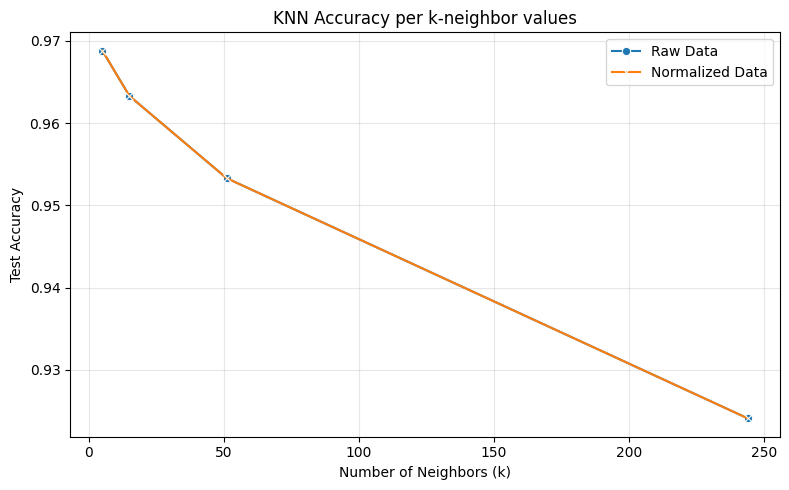

In [19]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.lineplot(
    x=list(accuracies.keys()), y=list(accuracies.values()), marker="o", label="Raw Data"
)
sns.lineplot(
    x=list(accuracies_norm.keys()),
    y=list(accuracies_norm.values()),
    marker="x",
    label="Normalized Data",
)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Accuracy")
plt.title("KNN Accuracy per k-neighbor values")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Train a classifier with the best k
best_k = max(accuracies_norm, key=accuracies_norm.get)
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train_flat_norm, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


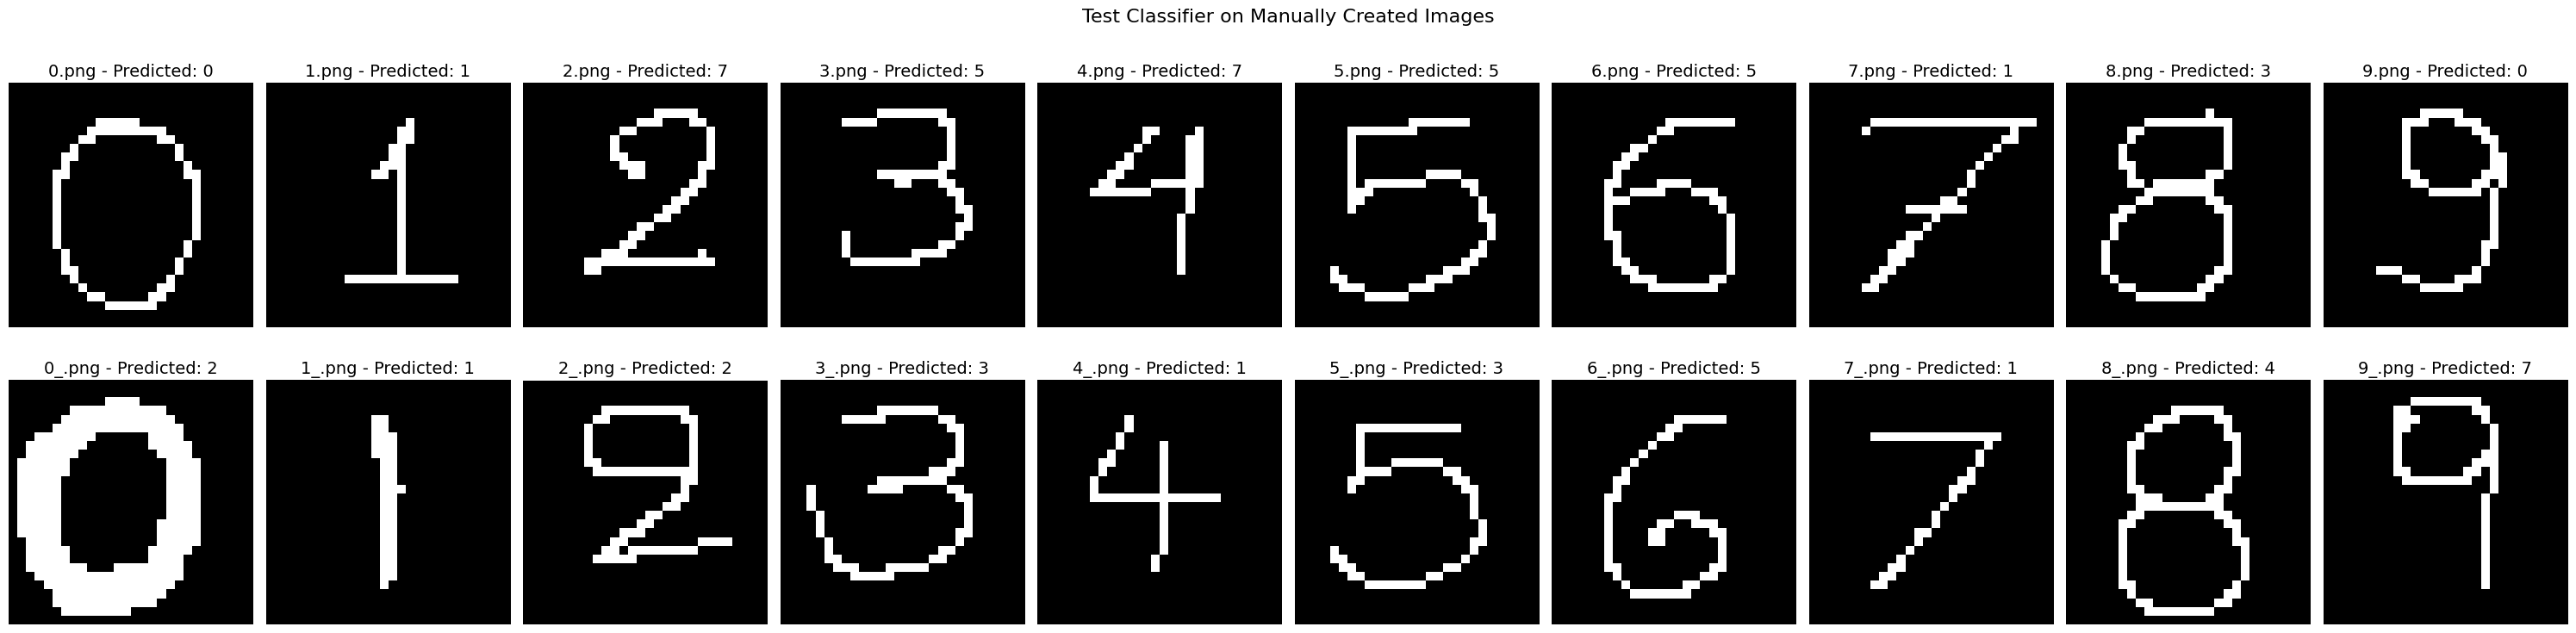

In [49]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Get all PNG files in the current directory
png_files = glob.glob("*.png")

fig, axes = plt.subplots(2, 10, figsize=(3 * 10, 8))

row1_col_idx = 0
row2_col_idx = 0
for file in png_files:
    img = Image.open(file).convert("L")
    img_array = np.array(img)
    img_flat = img_array.reshape(1, -1)
    img_flat = img_flat / 255
    predicted_label = best_knn.predict(img_flat)[0]
    if "_" not in os.path.basename(file):
        ax = axes[0, row1_col_idx]
        row1_col_idx += 1
    else:
        ax = axes[1, row2_col_idx]
        row2_col_idx += 1
    ax.imshow(img_array, cmap="gray")
    ax.set_title(
        f"{os.path.basename(file)} - Predicted: {predicted_label}",
        fontsize=14,
    )
    ax.axis("off")

fig.suptitle("Test Classifier on Manually Created Images", fontsize=16)
plt.tight_layout()
plt.show()